In [457]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [458]:
df = pd.read_csv('/home/hsj/TSLA.csv')
## csv 읽기
df.tail()
#min-max 정규화
def minmax(x):
    a=min(x)
    b=max(x)
    x=np.array(x)
    #mean=np.mean(x)
    #std=np.std(x)
    print('max',a)
    print('min',b)
    return (x-a)/(b-a)


In [459]:
## 테스트 데이터셋
#X = np.array(df.drop(['Prediction'], axis = 1))
x1= np.array(df['Open'])
x2= np.array(df['High'])
x3= np.array(df['Low'])
x4= np.array(df['Close'])
x5= np.array(df['Adj Close'])
x6= np.array(df['Volume'])
y= np.array(df['Close'])

x1_pred= np.array(df['Open'])
x2_pred= np.array(df['High'])
x3_pred= np.array(df['Low'])
x4_pred= np.array(df['Close'])
x5_pred= np.array(df['Adj Close'])
x6_pred= np.array(df['Volume'])
y_pred= np.array(df['Close'])
def days(x):
    x=np.array(x)
    x=x[222:252]
    print(x.shape)
    #print(x.len)
    return x

#def pred_pay(x):
x1=days(x1)
x2=days(x2)
x3=days(x3)
x4=days(x4)
x5=days(x5)
x6=days(x6)
y=days(y)
x1=minmax(x1)
x2=minmax(x2)
x3=minmax(x3)
x4=minmax(x4)
x5=minmax(x5)
x6=minmax(x6)
y=minmax(y)
#test data 만들기

x1_pred=x1_pred[252]
x2_pred=x2_pred[252]
x3_pred=x3_pred[252]
x4_pred=x4_pred[252]
x5_pred=x5_pred[252]
x6_pred=x6_pred[252]
y_pred=y_pred[252]
#y는 학습에 안쓰임.
print(x2_pred)
x1_pred=(x1_pred-168.63)/(234.05-168.63)
x2_pred=(x2_pred-170.919998)/(237.399994-170.919998)
x3_pred=(x3_pred-166.190002)/(227.279999-166.190002)
x4_pred=(x4_pred-167.869995)/(228.520004-167.869995)
x5_pred=(x5_pred-167.869995)/(228.520004-167.869995)
x6_pred=(x6_pred-50672700)/(132703000-50672700)
y_test_pred=(y_pred-167.869995)/(228.520004-167.869995)
print(y_pred)


(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
(30,)
max 168.630005
min 234.050003
max 170.919998
min 237.399994
max 166.190002
min 227.279999
max 167.869995
min 228.520004
max 167.869995
min 228.520004
max 50672700
min 132703000
max 167.869995
min 228.520004
194.759995
194.699997


In [460]:
## 모델
class H():
    def __init__(self,w1,w2,w3,w4,w5,w6,b): 

        self.w1=w1
        self.w2=w2
        self.w3=w3
        self.w4=w4
        self.w5=w5
        self.w6=w6
        self.b=b
    def forward(self,x1,x2,x3,x4,x5,x6):
        return x1*self.w1+x2*self.w2+x3*self.w3+x4*self.w4+x5*self.w5+x6*self.w6+self.b

h=H(1,1,1,1,1,1,1)
a=h.forward(1,1,1,1,1,1)
print((x1-y)**2)

[4.59613396e-03 1.23166930e-02 1.91057946e-03 3.61746351e-02
 2.15416631e-02 7.05002304e-02 2.55885088e-02 7.86641768e-05
 1.74828433e-02 1.08135663e-02 1.33208095e-04 1.01623469e-02
 1.66484092e-02 2.96013682e-02 1.69321271e-02 3.21346019e-06
 3.17971632e-02 2.66484394e-03 3.91244692e-02 1.33258864e-04
 4.50216801e-04 1.27040321e-03 3.21666811e-04 2.29065072e-03
 1.21801732e-02 1.13136419e-03 3.14174329e-02 1.59238092e-05
 5.61846853e-03 1.32432488e-03]


In [461]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []
w4_grad = []
w5_grad = []
w6_grad = []

num_epoch=500000
learning_rate=0.05

w1 = np.random.uniform(low=-0.01, high=0.01)
w2 = np.random.uniform(low=-0.01, high=0.01)
w3 = np.random.uniform(low=-0.01, high=0.01)
w4 = np.random.uniform(low=-0.01, high=0.01)
w5 = np.random.uniform(low=-0.01, high=0.01)
w6 = np.random.uniform(low=-0.01, high=0.01)
b = np.random.uniform(low=-1.0, high=1.0)
print('w61',w6 )
for epoch in range(num_epoch):
    # 예측값
    h=H(w1,w2,w3,w4,w5,w6,b)
    y_hat=h.forward(x1,x2,x3,x4,x5,x6)
    
    #print(y_hat)
    error = ((y_hat - y)**2).mean()
    #error = (abs(y_hat - y)).mean()
    if error < 0.00001:
        break
    
    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * np.mean(((y_hat - y) * x1))
    w2 = w2 - learning_rate * np.mean(((y_hat - y) * x2))
    w3 = w3 - learning_rate *np.mean(((y_hat - y) * x3))
    w4 = w4 - learning_rate * np.mean(((y_hat - y) * x4))
    w5 = w5 - learning_rate *np.mean(((y_hat - y) * x5))
    w6 = w6 - learning_rate *np.mean(((y_hat - y) * x6))
    #print('w6',w6)
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)
    w4_grad.append(w4)
    w5_grad.append(w5)
    w6_grad.append(w6)
    
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)
    
    if epoch % 1000 == 0:
        #print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f},w4 = {4:.5f},w5 = {5:.5f},w6 = {6:.5f} b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, w4,w5,w6, b, error))
        print(epoch)
        print('error',error)
        print(y_hat)
        print(y)


w61 -0.000514763235680428
0
error 1.9407646603274316
[-0.80698312 -0.80852204 -0.81351697 -0.81276758 -0.81383947 -0.81015787
 -0.80751237 -0.8054947  -0.80681766 -0.80618825 -0.80402769 -0.80814887
 -0.81076159 -0.81085007 -0.81545733 -0.82012907 -0.82238389 -0.82168633
 -0.82064366 -0.82003049 -0.8183208  -0.82078173 -0.82302559 -0.82372855
 -0.82760916 -0.82888107 -0.82537682 -0.82299008 -0.82352116 -0.82340006]
[0.86265456 0.8931573  0.64979387 0.76784831 0.71525142 0.89942283
 0.93602631 0.94344588 1.         0.98384154 0.98845842 0.77675176
 0.78219284 0.65292663 0.48161587 0.386315   0.1602638  0.3767519
 0.46331413 0.38054408 0.43775761 0.31409728 0.25226712 0.20313281
 0.         0.03363576 0.25276174 0.24715587 0.24814511 0.21368516]
1000
error 0.0010447137556869913
[0.893715   0.87497386 0.67722857 0.72068746 0.68513985 0.86088398
 0.93138084 0.96019392 0.95884033 0.96574611 1.01715983 0.81664458
 0.76082286 0.71346335 0.53007747 0.40766096 0.23876103 0.3663966
 0.42090348 0

In [462]:
b

-0.0004930329398568713

In [463]:
print(x2_pred)
print(w2_pred)
y_pred=w1_pred*x1_pred+w2_pred*x2_pred+w3_pred*x3_pred+w4_pred*x4_pred+w5_pred*x5_pred+w6_pred*x6_pred+b
y_pred=y_pred*(228.520004-167.869995)+167.869995 #예측한 것 복원 
y_test_pred=(y_pred-167.869995)/(228.520004-167.869995)
y=y*(228.520004-167.869995)+167.869995
# min max 정규화 반대 과정.
print(y_pred)


0.3586040679063821
0.0061931569030246585
168.74140341958503


In [464]:
w6_pred=w6_grad[num_epoch-1]
w5_pred=w6_grad[num_epoch-1]
w4_pred=w6_grad[num_epoch-1]
w3_pred=w6_grad[num_epoch-1]
w2_pred=w6_grad[num_epoch-1]
w1_pred=w6_grad[num_epoch-1]



IndexError: list index out of range

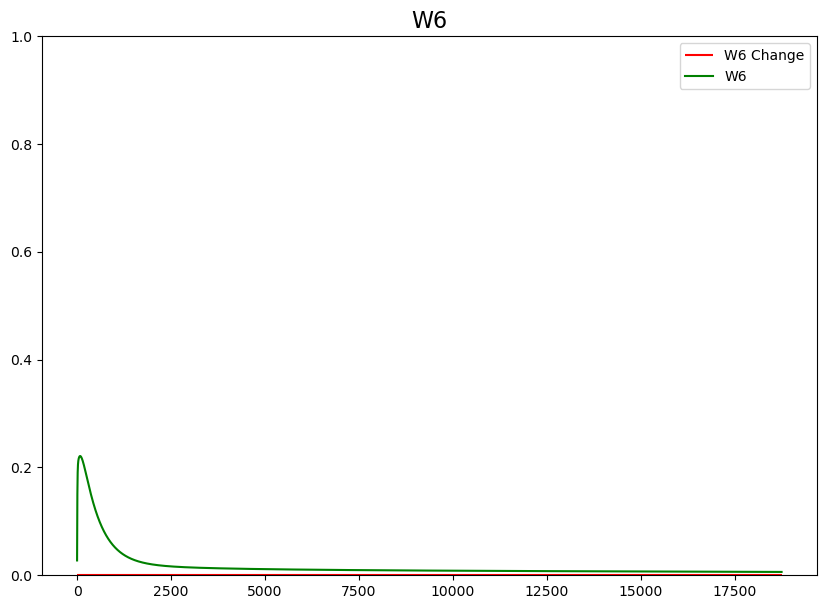

In [470]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.0, xmin=0, xmax=len(w6_grad), color='r')
plt.plot(w6_grad, color='g')
plt.ylim(0, 1)
plt.title('W6', fontsize=16)
plt.legend(['W6 Change', 'W6'])
plt.show()